# 04. Case Study - Privacy in Practice

In this notebook, we'll explore the possibilties for data privacy on a new dataset. In this notebook, you'll be asked to work in small groups, so make friends with someone seated near you. 

Your challenge is that you are working with a health care provider, who would like to do the "machine learning" on this dataset to figure out if there are preventative measures that can be taken so fewer patients are seen in the hospital for related care or so that their visits are shorter. The goal is that more potentially affected patients are given access to primary care physicians and regular medication or visits that can keep them out of the hostpital for long stays. This study is focused on blood-sugar related illnesses, but not only diabetes.

Using this dataset, we'll walk through a few possible scenarios and apply what we have learned today about data privacy to this new use case.

## Part One: Determining What's Useful and What's Sensitive

- Data completeness
- Potential sensitive columns
- Potential useful features
- What should we use (or not use)? Why?

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('../data/health_data.csv')

In [2]:
df.head()

,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,id,insulin,marital_status,no_primary_dr,patient_name,private_insurance,released_sameday,ssn,symptom_code
0,2018-05-09 12:06:28,49,1,108,99,1,district,15,6,1000,1,single,False,Rachel Shelton,0,0,743-97-4081,4
1,2018-05-12 10:02:55,82,1,70,100,1,general,22,1,1001,1,married,False,Barbara Medina,0,0,698-10-2230,3
2,2018-05-13 12:25:17,71,1,100,78,1,northern,1,4,1002,1,no_answer,True,Kaitlyn Daniels,0,1,540-83-4297,2
3,2018-05-14 12:20:08,87,0,113,72,1,general,22,4,1003,1,no_answer,False,William Reyes,1,0,282-96-8755,0
4,2018-05-17 08:35:23,53,1,93,80,1,district,17,8,1004,0,no_answer,True,Eric Booth,0,0,130-25-8918,8


In [3]:
from datetime import datetime
df.admitted_ts = df.admitted_ts.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') + timedelta(days=-8*12*30) if datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year > 2018 else x)

In [4]:
df.to_csv('../data/health_data.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
admitted_ts              1000 non-null object
age                      1000 non-null int64
ambulance_call           1000 non-null int64
blood_sugar_reading      1000 non-null int64
days_since_last_visit    1000 non-null int64
has_diabetes             1000 non-null int64
hospital                 1000 non-null object
hours_hospitalized       1000 non-null int64
hydration_level          1000 non-null int64
id                       1000 non-null int64
insulin                  1000 non-null int64
marital_status           1000 non-null object
no_primary_dr            1000 non-null bool
patient_name             1000 non-null object
private_insurance        1000 non-null int64
released_sameday         1000 non-null int64
ssn                      1000 non-null object
symptom_code             1000 non-null int64
dtypes: bool(1), int64(12), object(5)
memory usage: 133.9+ KB


In [6]:
df.describe()

,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hours_hospitalized,hydration_level,id,insulin,private_insurance,released_sameday,symptom_code
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.22100,0.504000,109.108000,59.778000,0.754000,10.928000,4.566000,1499.500000,0.492000,0.475000,0.354000,4.586000
std,20.69663,0.500234,22.908014,23.054853,0.430894,6.322087,2.879225,288.819436,0.500186,0.499624,0.478448,2.892226
min,16.00000,0.000000,70.000000,20.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,35.00000,0.000000,90.000000,39.000000,1.000000,6.000000,2.000000,1249.750000,0.000000,0.000000,0.000000,2.000000
50%,51.00000,1.000000,109.000000,60.000000,1.000000,11.000000,5.000000,1499.500000,0.000000,0.000000,0.000000,4.000000
75%,70.25000,1.000000,128.000000,80.000000,1.000000,16.000000,7.000000,1749.250000,1.000000,1.000000,1.000000,7.000000
max,88.00000,1.000000,149.000000,100.000000,1.000000,22.000000,9.000000,1999.000000,1.000000,1.000000,1.000000,9.000000


In [7]:
# if you'd like, continue to look at column distributions, values or feel free to plot a few which are of interest to you.

## Discussion:

- What columns should we use? 
- Which ones should we remove?
- Are there columns which we should protect but not remove? 

For each, we need some justification or thought!

In [8]:
cols_to_drop = ['id', 'patient_name', 'ssn']

df = df.drop(columns=cols_to_drop)

In [9]:
df.columns

Index(['admitted_ts', 'age', 'ambulance_call', 'blood_sugar_reading',
       'days_since_last_visit', 'has_diabetes', 'hospital',
       'hours_hospitalized', 'hydration_level', 'insulin', 'marital_status',
       'no_primary_dr', 'private_insurance', 'released_sameday',
       'symptom_code'],
      dtype='object')

## Part Two: Determining the Approach for Protecting the Columns

- Scenario One: You are an employee of the company which produced this data. You have full access and can use full variables for building your model; however, you want to respect privacy and ensure your model is valuable without leaking private information.

- Scenario Two: You are the database manager at the health care provider asked to prepare the data to send to a machine learning consultant who will help give you a more detailed analysis. The consultant has signed all the necessary NDAs, but you have instructions to keep the private or potentially sensitive data to a minimum.

- Scenario Three: You suggested releasing the dataset to Kaggle. It will be uploaded so hundreds of Kagglers can participate. For the sake of avoiding a long legal argument, let's say all patients were part of a study in which they signed a waiver that their records could be released publicly. That said, you still want to avoid a PR nightmare and protect the data as much as possible. 

Based on the scenario for your team above, what do you do?

In [10]:
# any investigation code to see what approach you might use

In [11]:
df.has_diabetes.value_counts()

1    754
0    246
Name: has_diabetes, dtype: int64

In [12]:
df.private_insurance.value_counts()

0    525
1    475
Name: private_insurance, dtype: int64

In [13]:
df.no_primary_dr.value_counts()

False    591
True     409
Name: no_primary_dr, dtype: int64

In [14]:
df.corr()['no_primary_dr']

age                      0.001633
ambulance_call           0.011651
blood_sugar_reading      0.073805
days_since_last_visit    0.012869
has_diabetes             0.069018
hours_hospitalized      -0.025929
hydration_level         -0.058305
insulin                  0.035689
no_primary_dr            1.000000
private_insurance       -0.453227
released_sameday         0.039190
symptom_code             0.023448
Name: no_primary_dr, dtype: float64

In [15]:
df.marital_status.value_counts()

married      272
single       255
divorced     254
no_answer    219
Name: marital_status, dtype: int64

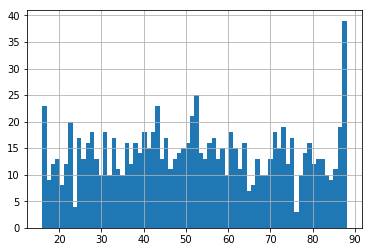

In [16]:
df.age.hist(bins=70)

### Discussion

- What methods will be most effective in the scenario you have? 
- Have you considered potential data leakage within the *non-sensitive* columns?
- Is there other sensitive or secret data we should address given the scenario?

### Step Three: Implement Data Protection for the Dataset

Now it's time to code! Feel free to utilize code from the previous notebooks to implement protection of at least two of the columns you chose as sensitive. Are there ways to make these applications more Pandas-friendly or easy to use? 


## Exercise

**Implement protection for the columns you are keeping -- you may use code from previous notebooks in this workshop. If you'd like to use our API, you can check out the documentation at: https://docs.kiprotect.com **

In [12]:
# %load ../solutions/case-study/possible-solution.py

# scenario three: possible implementation (to hide as solution for hints)# scena 


## pseudonymize hospital, age and admitted timestamp
import json
import requests


SHARED_KEY = '42a2d3fc1cc449e2a27ddd457e056012'

item_list = list(df.T.to_dict().values())
actions = [
    {
        "name": "pseudonymize-hospital",
        "transform-value" : {
            "key": "hospital",
            "pseudonymize" : {
                "method": "merengue",
                "key": "oljHJOLtQo0Xy0fvi1H6adUtue0KkUVjti4JChQOhFQ=" 
            }
        }
    },
    {
        "name": "pseudonymize-age",
        "transform-value": {
            "key": "age",
            "pseudonymize": {
                "method": "structured",
                "key": "320fidsjkl8wy8uiofme#908",
                "type": "integer",
                "format": "raw",
                "typeParams": {
                    "min": 16,
                    "max": 100
                }
            }
        }
    },
    {
        "name": "pseudonymize-admitted-ts",
        "transform-value": {
            "key": "admitted_ts",
            "pseudonymize": {
                "method": "structured",
                "key": "320fidsjkl8wy8uiofme#908",
                "type": "date",
                "preservePrefix": True,
                "format": "%(2000-2019)Y-%m-%d %H:%M:%S"
            }
        }
    }
]

pseudonymized_data = requests.post(
    'https://api.kiprotect.com/v1/transform', 
    data = json.dumps(
        {"actions": actions, "items": item_list}, 
        allow_nan=False),
    headers = {'Authorization': 'Bearer {}'.format(
        SHARED_KEY)}
)

protected_df = pd.DataFrame(pseudonymized_data.json()['items'])


In [13]:
protected_df.head()


,_kip,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,id,insulin,marital_status,no_primary_dr,patient_name,private_insurance,released_sameday,ssn,symptom_code
0,64656661756c74,2001-01-19 07:32:22,77,1,108,99,1,4g+yU1c0vL8=,15,6,1000,1,single,False,Rachel Shelton,0,0,743-97-4081,4
1,64656661756c74,2002-03-21 04:33:23,69,1,70,100,1,b5vYTegcqA==,22,1,1001,1,married,False,Barbara Medina,0,0,698-10-2230,3
2,64656661756c74,2002-06-25 10:43:14,50,1,100,78,1,8HqMmL1nixk=,1,4,1002,1,no_answer,True,Kaitlyn Daniels,0,1,540-83-4297,2
3,64656661756c74,2010-06-26 00:13:07,87,0,113,72,1,b5vYTegcqA==,22,4,1003,1,no_answer,False,William Reyes,1,0,282-96-8755,0
4,64656661756c74,2013-11-10 15:22:28,44,1,93,80,1,4g+yU1c0vL8=,17,8,1004,0,no_answer,True,Eric Booth,0,0,130-25-8918,8


In [14]:
pseudonymized_data.json()['params']

{u'64656661756c74': {u'pseudonymize-admitted-ts': {u'key': u'NeAG8rmD3E6U0f8deiD3dghs+B6QfrK8sen+8twWHmA='},
  u'pseudonymize-age': {u'key': u'NeAG8rmD3E6U0f8deiD3dghs+B6QfrK8sen+8twWHmA='},
  u'pseudonymize-hospital': {u'key': u'46iw3FU/wlsjyFY68lZns4pqb4prHWVIIAsQ9XScYHI='}}}

In [18]:
import json
import requests

SHARED_KEY = '42a2d3fc1cc449e2a27ddd457e056012'

item_list = list(protected_df.T.to_dict().values())
actions = [
    {
            "name": "decode-hospital",
            "transform-value": {
                "key": "hospital",
                "decode": {
                    "format": "base64"
                }
            }
    },
    {
            "name": "depseudonymize-hospital",
            "transform-value": {
                "key": "hospital",
                "depseudonymize": {
                    "method": "merengue",
                    "key": "oljHJOLtQo0Xy0fvi1H6adUtue0KkUVjti4JChQOhFQ=2" 
                }
            }
    },
    {
            "name": "encode-hospital",
            "transform-value": {
                "key": "hospital",
                "encode": {
                    "format": "utf-8"
                }
            }
    },
     {
        "name": "depseudonymize-",
        "transform-value": {
            "key": "age",
            "depseudonymize": {
                "method": "structured",
                "key": "320fidsjkl8wy8uiofme#908",
                "type": "integer",
                "format": "raw",
                "typeParams": {
                    "min": 16,
                    "max": 100
                }
            }
        }
    },
    {
        "name": "depseudonymize-age",
        "transform-value": {
            "key": "age",
            "depseudonymize": {
                "method": "structured",
                "key": "320fidsjkl8wy8uiofme#908",
                "type": "integer",
                "format": "raw",
                "typeParams": {
                    "min": 16,
                    "max": 100
                }
            }
        }
    },
    {
        "name": "depseudonymize-admitted-ts",
        "transform-value": {
            "key": "admitted_ts",
            "depseudonymize": {
                "method": "structured",
                "key": "320fidsjkl8wy8uiofme#908",
                "type": "date",
                "preservePrefix": True,
                "format": "%(2000-2019)Y-%m-%d %H:%M:%S"
            }
        }
    }
]

depseudonymized_data = requests.post(
    'https://api.kiprotect.com/v1/transform', 
    data = json.dumps(
        {"actions": actions, "items": item_list}, 
        allow_nan=False),
    headers = {'Authorization': 'Bearer {}'.format(
        SHARED_KEY)}
)

#pseudonymized_data.json()
original_df = pd.DataFrame(depseudonymized_data.json()['items'])
original_df.head()

,_kip,admitted_ts,age,ambulance_call,blood_sugar_reading,days_since_last_visit,has_diabetes,hospital,hours_hospitalized,hydration_level,id,insulin,marital_status,no_primary_dr,patient_name,private_insurance,released_sameday,ssn,symptom_code
0,64656661756c74,2018-05-09 12:06:28,36,1,108,99,1,district,15,6,1000,1,single,False,Rachel Shelton,0,0,743-97-4081,4
1,64656661756c74,2018-05-12 10:02:55,73,1,70,100,1,general,22,1,1001,1,married,False,Barbara Medina,0,0,698-10-2230,3
2,64656661756c74,2018-05-13 12:25:17,54,1,100,78,1,northern,1,4,1002,1,no_answer,True,Kaitlyn Daniels,0,1,540-83-4297,2
3,64656661756c74,2018-05-14 12:20:08,87,0,113,72,1,general,22,4,1003,1,no_answer,False,William Reyes,1,0,282-96-8755,0
4,64656661756c74,2018-05-17 08:35:23,63,1,93,80,1,district,17,8,1004,0,no_answer,True,Eric Booth,0,0,130-25-8918,8


## Exercise

**Use a randomized response scheme to protect the values of the **no_primary_dr** and **has_diabetes** columns of the dataset.**

In [23]:
# %load "../solutions/case-study/dp.py"
import numpy as np
import random

def process_value(value, p, k):
    """
    :param value: The value to apply the differentially private scheme to.
    :param     p: The probability of returning a random value instead of the true one
    :param     k: The probability of returning 1 when generating a random value
    :    returns: A new, differentially private value
    """
    rv = random.random()
    if rv <= p:
        #we return a random value
        rv = random.random()
        if rv <= k:
            return 0
        return 1
    else:
        return value

    
p = 0.5
k = 0.5
    
columns = ['no_primary_dr', 'has_diabetes']

for column in columns:
    binary_column = '{}_binary'.format(column)
    df[binary_column] = np.where(df[column] == False, 0, 1) 
    values = []
    for value in df[binary_column]:
        values.append(process_value(value, p, k))
    dp_column = '{}_dp'.format(column)
    df[dp_column] = np.array(values)
    
df[['no_primary_dr_binary','no_primary_dr_dp']][:20]


,no_primary_dr_binary,no_primary_dr_dp
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,1
9,1,1


### Discussion:

- What was difficult to decide and implement?
- How might this relate to real problems in machine learning with sensitive data? 
- Does this apply to your work? How? What can you take away?

In [24]:
protected_df.to_csv('../data/health_data_protected.csv', index=False)